In [2]:
# Dependencies and Setup
import pandas as pd
import datetime as date
import numpy as np
import requests
import matplotlib.pyplot as plt

In [3]:
# Import data to pd, and display sample
insurance_csv = 'Data/cgr-premiums-table.csv'
ins_df = pd.read_csv(insurance_csv)
ins_df.head()

,gender,birthdate,ypc,current_premium,age
0,M,10/5/1947,0,863.97,75.17
1,F,7/6/1953,0,828.63,69.42
2,M,4/18/1956,0,1000.59,66.63
3,F,8/16/1956,0,700.42,66.30
4,F,1/23/1957,0,505.92,65.87


In [4]:
# Create bins of age ranges
bins = [25, 29.99, 39.99, 49.99, 59.99, 69.99, 79.99, 89.99, 99.99, 200]
group_names = ["25-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89", "90-100", "100+"]

In [5]:
# Add bins to df
ins_df["Age Range"] = pd.cut(ins_df["age"], bins, labels=group_names, include_lowest=True)
ins_df.head(30)

,gender,birthdate,ypc,current_premium,age,Age Range
0,M,10/5/1947,0,863.97,75.17,70-79
1,F,7/6/1953,0,828.63,69.42,60-69
2,M,4/18/1956,0,1000.59,66.63,60-69
3,F,8/16/1956,0,700.42,66.30,60-69
4,F,1/23/1957,0,505.92,65.87,60-69
5,F,12/31/1960,0,1674.34,61.93,60-69
6,M,2/26/1963,0,1266.17,59.77,50-59
7,F,7/31/1963,0,733.96,59.35,50-59
8,M,12/5/1964,0,1671.38,58.00,50-59
9,F,7/4/1966,0,655.97,56.42,50-59


In [6]:
# Group by age range and find mean of current_premium
age_group_df = ins_df.groupby(["Age Range"]).mean()

#Show DataFrame
age_group_df

,ypc,current_premium,age
Age Range,,,
25-29,1.972789,977.516054,29.353810
30-39,3.374079,875.024513,36.204732
40-49,3.608645,962.421221,44.881979
50-59,3.967887,1134.201804,55.199210
60-69,4.179806,1156.396674,64.782437
70-79,4.393440,1014.475426,74.419209
80-89,4.578452,878.631642,84.226784
90-100,4.621858,750.839344,93.753754
100+,4.702247,706.409944,102.081124


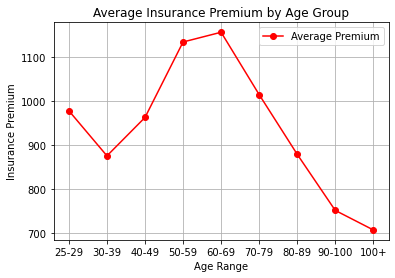

In [7]:
#Create Line Graph
age_group_df.unstack('Age Range')['current_premium'].plot(color="red", marker = "o", label="Average Premium")

#Create Line Graph Title and Labels
plt.title("Average Insurance Premium by Age Group")
plt.ylabel("Insurance Premium")

#Create Line Graph Legend
plt.legend(loc="best")

#Plot grid on Line Graph
plt.grid()

#Show Line Graph
plt.show()

In [8]:
#Count Number of People in Each Age Group
people_count = ins_df.groupby(["Age Range"]).size()

#Show Count
people_count

Age Range
25-29       147
30-39     13711
40-49     17953
50-59     20833
60-69     21145
70-79     11890
80-89      5105
90-100     1830
100+        178
dtype: int64

In [9]:
#Add People Count to Age Group DataFrame
age_group_df["Number of People"] = people_count

#Show Data Frame
age_group_df

,ypc,current_premium,age,Number of People
Age Range,,,,
25-29,1.972789,977.516054,29.353810,147
30-39,3.374079,875.024513,36.204732,13711
40-49,3.608645,962.421221,44.881979,17953
50-59,3.967887,1134.201804,55.199210,20833
60-69,4.179806,1156.396674,64.782437,21145
70-79,4.393440,1014.475426,74.419209,11890
80-89,4.578452,878.631642,84.226784,5105
90-100,4.621858,750.839344,93.753754,1830
100+,4.702247,706.409944,102.081124,178


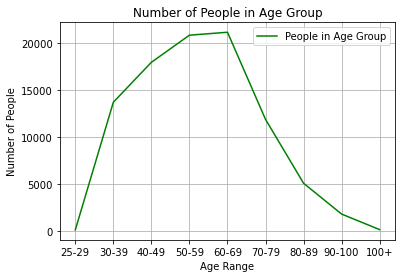

In [10]:
#Create Line Graph 
age_group_df.unstack('Age Range')['Number of People'].plot(color="green", label="People in Age Group")

#Create Title and Labels
plt.title("Number of People in Age Group")
plt.ylabel("Number of People")

#Create Legend
plt.legend(loc="best")

#Create Grids
plt.grid()

#Show Line Graph
plt.show()



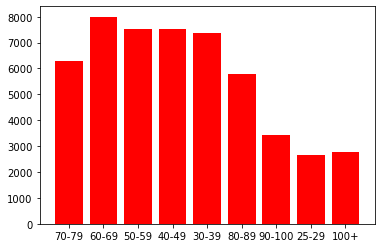

In [30]:

plt.bar(ins_df["Age Range"], ins_df["current_premium"], color="red")
plt.show()